In [2]:
#Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from keras.utils import np_utils
from tensorflow import optimizers
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [3]:
pinsoro = pd.read_csv('combine_child_upgraded.csv', low_memory = False)

In [4]:
qamqor = pd.read_csv('qamqor_updated.csv')

# Qamqor without transfer learning

In [4]:
#Features and labels for qamqor
X_q = np.array(qamqor[qamqor.columns[0:176]])
y_q = np.array(qamqor['engagement_bin'])

In [5]:
#Split to train, validation, and test sets in ratio 80:10:10 for qamqor
Xq_train, Xq_rem, yq_train, yq_rem = train_test_split(X_q, y_q, train_size=0.8, random_state=123, stratify=y_q)
Xq_valid, Xq_test, yq_valid, yq_test = train_test_split(Xq_rem,yq_rem, test_size=0.5, random_state=123, stratify=yq_rem)

In [6]:
#Sets' shapes for qamqor
print(Xq_train.shape), print(yq_train.shape)
print(Xq_valid.shape), print(yq_valid.shape)
print(Xq_test.shape), print(yq_test.shape)

(77680, 176)
(77680,)
(9710, 176)
(9710,)
(9711, 176)
(9711,)


(None, None)

In [72]:
#Neural network model for qamqor
model_qamqor = Sequential(
    [
    layers.Dense(256, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(1,activation = 'sigmoid')
    ])
model_qamqor.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(0.001), metrics=['accuracy'])

In [73]:
#training
history_q = model_qamqor.fit(Xq_train, yq_train, validation_data=(Xq_valid, yq_valid), batch_size = 1000, epochs = 15, verbose = 1)

Epoch 1/15
78/78 [==============================] - 1s 4ms/step - loss: 5.0944 - accuracy: 0.6973 - val_loss: 0.5907 - val_accuracy: 0.7309
Epoch 2/15
78/78 [==============================] - 0s 3ms/step - loss: 0.6029 - accuracy: 0.7283 - val_loss: 0.5780 - val_accuracy: 0.7313
Epoch 3/15
78/78 [==============================] - 0s 3ms/step - loss: 0.5821 - accuracy: 0.7306 - val_loss: 0.6276 - val_accuracy: 0.7313
Epoch 4/15
78/78 [==============================] - 0s 3ms/step - loss: 0.5837 - accuracy: 0.7314 - val_loss: 0.5802 - val_accuracy: 0.7312
Epoch 5/15
78/78 [==============================] - 0s 3ms/step - loss: 0.5784 - accuracy: 0.7320 - val_loss: 0.5749 - val_accuracy: 0.7318
Epoch 6/15
78/78 [==============================] - 0s 3ms/step - loss: 0.5732 - accuracy: 0.7322 - val_loss: 0.5694 - val_accuracy: 0.7316
Epoch 7/15
78/78 [==============================] - 0s 3ms/step - loss: 0.5675 - accuracy: 0.7326 - val_loss: 0.5668 - val_accuracy: 0.7326
Epoch 8/15
78/78 [==

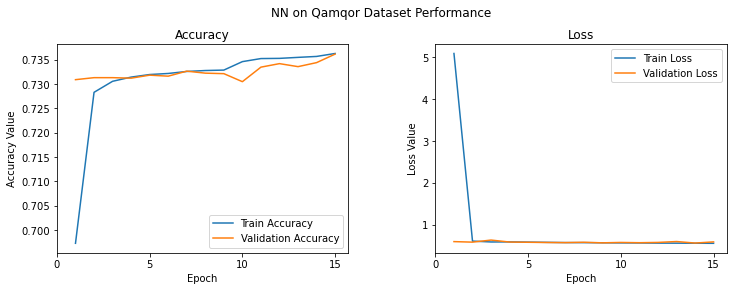

In [74]:
#Graph to test for overfitting
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('NN on Qamqor Dataset Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1, 16))
ax1.plot(epoch_list, history_q.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history_q.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 16, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history_q.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history_q.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 16, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [75]:
scores_q = model_qamqor.evaluate(Xq_test, yq_test, verbose = 1)

304/304 [==============================] - 0s 550us/step - loss: 0.5863 - accuracy: 0.7362


In [76]:
pred_yq = np.round(model_qamqor.predict(Xq_test))

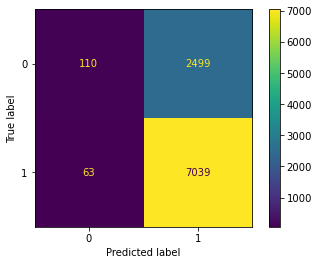

In [77]:
# Confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(yq_test, pred_yq))
disp.plot()

# Model for Pinsoro

In [7]:
#Features and labels for pinsoro
X_p = np.array(pinsoro[pinsoro.columns[0:176]])
y_p = pinsoro['purple_child_social_engagement']
#one hot encoding
y_p = np_utils.to_categorical(y_p)

In [8]:
#Split to train, validation, and test sets in ratio 80:10:10 for pinsoro
Xp_train, Xp_rem, yp_train, yp_rem = train_test_split(X_p, y_p, train_size=0.8, random_state=123, stratify=y_p)
Xp_valid, Xp_test, yp_valid, yp_test = train_test_split(Xp_rem, yp_rem, test_size=0.5, random_state=123, stratify=yp_rem)

In [9]:
#Sets' shapes for pinsoro
print(Xp_train.shape), print(yp_train.shape)
print(Xp_valid.shape), print(yp_valid.shape)
print(Xp_test.shape), print(yp_test.shape)

(1380336, 176)
(1380336, 6)
(172542, 176)
(172542, 6)
(172542, 176)
(172542, 6)


(None, None)

In [14]:
#Neural network model for pinsoro
model_pinsoro = Sequential(
    [
    layers.Dense(256, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(6,activation = 'softmax')
    ])
model_pinsoro.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(0.001), metrics=['accuracy'])

In [15]:
#training
history_p = model_pinsoro.fit(Xp_train, yp_train, validation_data=(Xp_valid, yp_valid), batch_size = 10000, epochs = 50, verbose = 1)

Epoch 1/50
139/139 [==============================] - 5s 37ms/step - loss: 1.6206 - accuracy: 0.3361 - val_loss: 1.5824 - val_accuracy: 0.3623
Epoch 2/50
139/139 [==============================] - 4s 27ms/step - loss: 1.5776 - accuracy: 0.3660 - val_loss: 1.5836 - val_accuracy: 0.3699
Epoch 3/50
139/139 [==============================] - 4s 27ms/step - loss: 1.5603 - accuracy: 0.3758 - val_loss: 1.6093 - val_accuracy: 0.3525
Epoch 4/50
139/139 [==============================] - 4s 28ms/step - loss: 1.5475 - accuracy: 0.3828 - val_loss: 1.5608 - val_accuracy: 0.3809
Epoch 5/50
139/139 [==============================] - 4s 26ms/step - loss: 1.5377 - accuracy: 0.3878 - val_loss: 1.5464 - val_accuracy: 0.3810
Epoch 6/50
139/139 [==============================] - 4s 27ms/step - loss: 1.5292 - accuracy: 0.3929 - val_loss: 1.5346 - val_accuracy: 0.3971
Epoch 7/50
139/139 [==============================] - 4s 26ms/step - loss: 1.5222 - accuracy: 0.3956 - val_loss: 1.5279 - val_accuracy: 0.3976

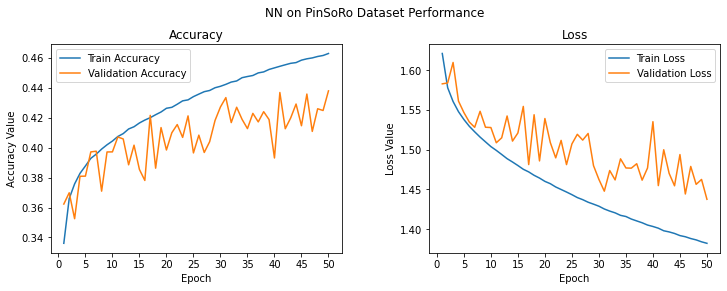

In [16]:
#Graph to test for overfitting
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('NN on PinSoRo Dataset Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1, 51))
ax1.plot(epoch_list, history_p.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history_p.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 51, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history_p.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history_p.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 51, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [17]:
#testing
scores_p = model_pinsoro.evaluate(Xp_test, yp_test, verbose = 1)

5392/5392 [==============================] - 10s 2ms/step - loss: 1.4428 - accuracy: 0.4359


In [18]:
pred_yp = np.argmax(model_pinsoro.predict(Xp_test), axis = 1)

In [19]:
true_yp = np.argmax(yp_test, axis = 1)

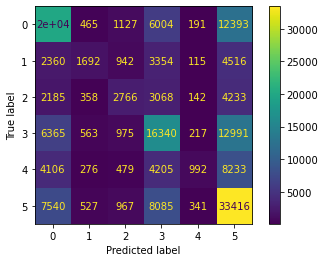

In [20]:
# Confusion matrix
disp2 = ConfusionMatrixDisplay(confusion_matrix(true_yp, pred_yp))
disp2.plot()

# Transfer learning for Qamqor


In [21]:
model_temp = model_pinsoro

In [22]:
#Freeze all layers of pinsoro model except the last one so that they are not trained
for layer in model_temp.layers[:-1]:
    layer.trainable = False


In [23]:
model_tl = Sequential(
    [
    model_temp,
    layers.Dense(1, activation = 'sigmoid'),
    
    ]
)

In [24]:
model_tl.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(0.001), metrics=['accuracy'])

In [25]:
#Training for qamqor with transfer learning - method 2
history_tl = model_tl.fit(Xq_train, yq_train, validation_data=(Xq_valid, yq_valid), batch_size = 1000, epochs = 15, verbose = 1)

Epoch 1/15
78/78 [==============================] - 1s 10ms/step - loss: 0.6841 - accuracy: 0.6026 - val_loss: 0.6526 - val_accuracy: 0.6333
Epoch 2/15
78/78 [==============================] - 0s 5ms/step - loss: 0.6337 - accuracy: 0.6531 - val_loss: 0.6194 - val_accuracy: 0.6677
Epoch 3/15
78/78 [==============================] - 0s 6ms/step - loss: 0.6129 - accuracy: 0.6743 - val_loss: 0.6039 - val_accuracy: 0.6861
Epoch 4/15
78/78 [==============================] - 1s 7ms/step - loss: 0.6021 - accuracy: 0.6861 - val_loss: 0.5981 - val_accuracy: 0.6910
Epoch 5/15
78/78 [==============================] - 1s 7ms/step - loss: 0.5940 - accuracy: 0.6984 - val_loss: 0.5914 - val_accuracy: 0.7016
Epoch 6/15
78/78 [==============================] - 1s 7ms/step - loss: 0.5896 - accuracy: 0.7057 - val_loss: 0.5866 - val_accuracy: 0.7110
Epoch 7/15
78/78 [==============================] - 1s 7ms/step - loss: 0.5862 - accuracy: 0.7152 - val_loss: 0.5834 - val_accuracy: 0.7243
Epoch 8/15
78/78 [=

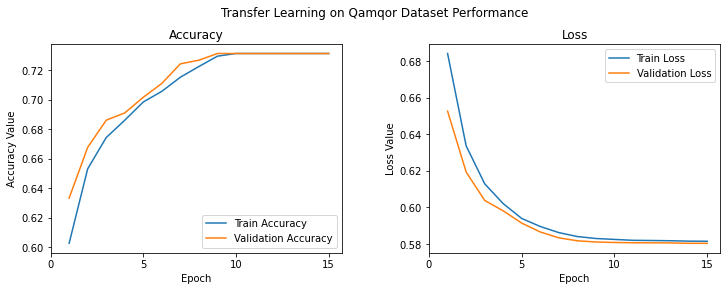

In [26]:
#Graph to test for overfitting
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Transfer Learning on Qamqor Dataset Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1, 16))
ax1.plot(epoch_list, history_tl.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history_tl.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 16, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history_tl.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history_tl.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 16, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [27]:
#testing
scores_tl = model_tl.evaluate(Xq_test, yq_test, verbose = 1)

304/304 [==============================] - 1s 2ms/step - loss: 0.5806 - accuracy: 0.7313


In [28]:
pred_ytl_q = np.round(model_tl.predict(Xq_test))

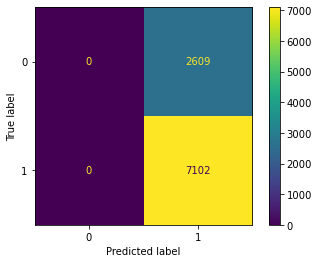

In [29]:
disp3 = ConfusionMatrixDisplay(confusion_matrix(yq_test, pred_ytl_q))
disp3.plot()

# Model for Pinsoro if binary classification is used


In [6]:
#Drop labels that are zero (missing)
pinsoro2 = pinsoro[pinsoro['purple_child_social_engagement'] != 0]

In [7]:
#Replace 1 and 2 with 0; 3, 4, and 5 with 1
pinsoro2['purple_child_social_engagement'].replace(to_replace = 1, value=0, inplace= True)
pinsoro2['purple_child_social_engagement'].replace(to_replace = 2, value=0, inplace= True)
pinsoro2['purple_child_social_engagement'].replace(to_replace = 3, value=1, inplace= True)
pinsoro2['purple_child_social_engagement'].replace(to_replace = 4, value=1, inplace= True)
pinsoro2['purple_child_social_engagement'].replace(to_replace = 5, value=1, inplace= True)

C:\Users\karin\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [8]:
#Features and labels for pinsoro2
X_p2 = np.array(pinsoro2[pinsoro2.columns[0:176]])
y_p2 = pinsoro2['purple_child_social_engagement']


In [9]:
#Split to train, validation, and test sets in ratio 80:10:10 for pinsoro2
Xp2_train, Xp2_rem, yp2_train, yp2_rem = train_test_split(X_p2, y_p2, train_size=0.8, random_state=123, stratify=y_p2)
Xp2_valid, Xp2_test, yp2_valid, yp2_test = train_test_split(Xp2_rem,yp2_rem, test_size=0.5, random_state=123, stratify=yp2_rem)

In [10]:
#Sets' shapes for pinsoro2
print(Xp2_train.shape), print(yp2_train.shape)
print(Xp2_valid.shape), print(yp2_valid.shape)
print(Xp2_test.shape), print(yp2_test.shape)

(1058787, 176)
(1058787,)
(132348, 176)
(132348,)
(132349, 176)
(132349,)


(None, None)

In [35]:
#Neural network model
model_pinsoro2 = Sequential(
    [
    layers.Dense(256, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(1,activation = 'sigmoid')
    ])
model_pinsoro2.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(0.001), metrics=['accuracy'])

In [36]:
#training
history_p2 = model_pinsoro2.fit(Xp2_train, yp2_train, validation_data=(Xp2_valid, yp2_valid), batch_size = 10000, epochs = 50, verbose = 1)

Epoch 1/50
106/106 [==============================] - 3s 31ms/step - loss: 0.4880 - accuracy: 0.8016 - val_loss: 0.4745 - val_accuracy: 0.8086
Epoch 2/50
106/106 [==============================] - 3s 29ms/step - loss: 0.4721 - accuracy: 0.8087 - val_loss: 0.4796 - val_accuracy: 0.8092
Epoch 3/50
106/106 [==============================] - 3s 25ms/step - loss: 0.4682 - accuracy: 0.8096 - val_loss: 0.4715 - val_accuracy: 0.8092
Epoch 4/50
106/106 [==============================] - 3s 25ms/step - loss: 0.4650 - accuracy: 0.8104 - val_loss: 0.4617 - val_accuracy: 0.8112
Epoch 5/50
106/106 [==============================] - 3s 25ms/step - loss: 0.4620 - accuracy: 0.8122 - val_loss: 0.4595 - val_accuracy: 0.8112
Epoch 6/50
106/106 [==============================] - 3s 32ms/step - loss: 0.4598 - accuracy: 0.8131 - val_loss: 0.4581 - val_accuracy: 0.8143
Epoch 7/50
106/106 [==============================] - 3s 26ms/step - loss: 0.4576 - accuracy: 0.8144 - val_loss: 0.4570 - val_accuracy: 0.8128

In [37]:
#testing
scores_p2 = model_pinsoro2.evaluate(Xp2_test, yp2_test, verbose = 1)

4136/4136 [==============================] - 11s 3ms/step - loss: 0.4169 - accuracy: 0.8318


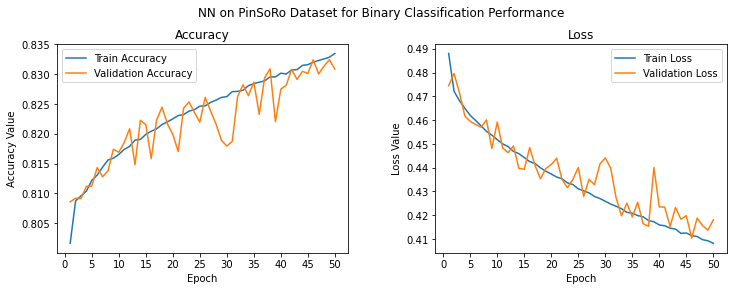

In [38]:
#Graph to test for overfitting
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('NN on PinSoRo Dataset for Binary Classification Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1, 51))
ax1.plot(epoch_list, history_p2.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history_p2.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 51, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history_p2.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history_p2.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 51, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [39]:
pred_yp2 = np.round(model_pinsoro2.predict(Xp2_test))

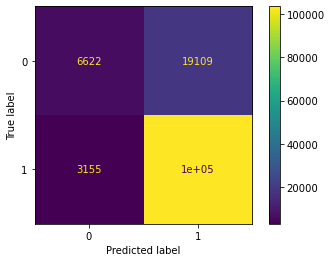

In [40]:
disp4 = ConfusionMatrixDisplay(confusion_matrix(yp2_test, pred_yp2))
disp4.plot()

# Transfer learning with binary classification for Pinsoro

In [41]:
model_tl_bin = model_pinsoro2

In [42]:
#Freeze all layers till the last one so that they are not trained
for layer in model_tl_bin.layers[:-1]:
    layer.trainable = False


In [43]:
model_tl_bin.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(0.001), metrics=['accuracy'])

In [44]:
#Training for qamqor with transfer learning
history_tl_bin = model_tl_bin.fit(Xq_train, yq_train, validation_data=(Xq_valid, yq_valid), batch_size = 1000, epochs = 15, verbose = 1)

Epoch 1/15
78/78 [==============================] - 1s 9ms/step - loss: 417.0185 - accuracy: 0.5884 - val_loss: 394.9434 - val_accuracy: 0.6122
Epoch 2/15
78/78 [==============================] - 0s 4ms/step - loss: 361.8041 - accuracy: 0.6226 - val_loss: 347.8903 - val_accuracy: 0.6349
Epoch 3/15
78/78 [==============================] - 0s 5ms/step - loss: 318.1263 - accuracy: 0.6375 - val_loss: 304.3644 - val_accuracy: 0.6435
Epoch 4/15
78/78 [==============================] - 0s 5ms/step - loss: 275.7586 - accuracy: 0.6446 - val_loss: 261.9332 - val_accuracy: 0.6477
Epoch 5/15
78/78 [==============================] - 0s 5ms/step - loss: 234.7645 - accuracy: 0.6500 - val_loss: 220.3500 - val_accuracy: 0.6508
Epoch 6/15
78/78 [==============================] - 0s 5ms/step - loss: 194.7108 - accuracy: 0.6530 - val_loss: 179.5534 - val_accuracy: 0.6492
Epoch 7/15
78/78 [==============================] - 0s 5ms/step - loss: 156.1832 - accuracy: 0.6538 - val_loss: 141.2053 - val_accuracy:

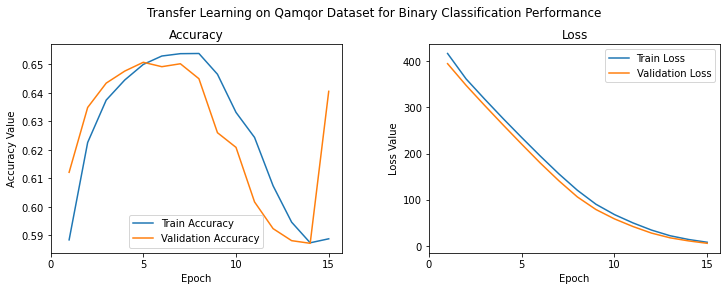

In [45]:
#Graph to test for overfitting
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Transfer Learning on Qamqor Dataset for Binary Classification Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1, 16))
ax1.plot(epoch_list, history_tl_bin.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history_tl_bin.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 16, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history_tl_bin.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history_tl_bin.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 16, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [46]:
#testing qamqor
scores_tl_bin = model_tl_bin.evaluate(Xq_test, yq_test, verbose = 1)

304/304 [==============================] - 1s 3ms/step - loss: 5.5432 - accuracy: 0.6450


In [47]:
pred_yq_tl_bin = np.round(model_pinsoro2.predict(Xq_test))

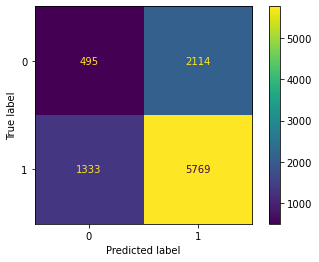

In [48]:
disp5 = ConfusionMatrixDisplay(confusion_matrix(yq_test, pred_yq_tl_bin))
disp5.plot()

# Qamqor - only keypoints for face

In [24]:
#Features and labels for qamqor
X_qf = np.array(qamqor[qamqor.columns[0:139]])
y_qf = np.array(qamqor['engagement_bin'])

In [25]:
#Split to train, validation, and test sets in ratio 80:10:10 for qamqor
Xqf_train, Xqf_rem, yqf_train, yqf_rem = train_test_split(X_qf, y_qf, train_size=0.8, random_state=123, stratify=y_qf)
Xqf_valid, Xqf_test, yqf_valid, yqf_test = train_test_split(Xqf_rem,yqf_rem, test_size=0.5, random_state=123, stratify=yqf_rem)

In [30]:
#Neural network model for qamqor
model_qf = Sequential(
    [
    layers.Dense(256, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(1,activation = 'sigmoid')
    ])
model_qf.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(0.001), metrics=['accuracy'])

In [31]:
#training
history_qf = model_qf.fit(Xqf_train, yqf_train, validation_data=(Xqf_valid, yqf_valid), batch_size = 1000, epochs = 15, verbose = 1)

Epoch 1/15
78/78 [==============================] - 1s 4ms/step - loss: 4.2913 - accuracy: 0.6148 - val_loss: 1.2040 - val_accuracy: 0.3696
Epoch 2/15
78/78 [==============================] - 0s 3ms/step - loss: 0.8636 - accuracy: 0.6971 - val_loss: 0.6789 - val_accuracy: 0.7309
Epoch 3/15
78/78 [==============================] - 0s 3ms/step - loss: 0.7264 - accuracy: 0.7269 - val_loss: 0.6661 - val_accuracy: 0.7307
Epoch 4/15
78/78 [==============================] - 0s 3ms/step - loss: 0.6591 - accuracy: 0.7313 - val_loss: 0.6394 - val_accuracy: 0.7301
Epoch 5/15
78/78 [==============================] - 0s 3ms/step - loss: 0.6828 - accuracy: 0.7294 - val_loss: 0.6391 - val_accuracy: 0.7313
Epoch 6/15
78/78 [==============================] - 0s 3ms/step - loss: 0.6335 - accuracy: 0.7313 - val_loss: 0.6278 - val_accuracy: 0.7313
Epoch 7/15
78/78 [==============================] - 0s 3ms/step - loss: 0.6275 - accuracy: 0.7313 - val_loss: 0.6176 - val_accuracy: 0.7313
Epoch 8/15
78/78 [==

In [32]:
scores_qf = model_qf.evaluate(Xqf_test, yqf_test, verbose = 1)

304/304 [==============================] - 0s 566us/step - loss: 0.5820 - accuracy: 0.7313


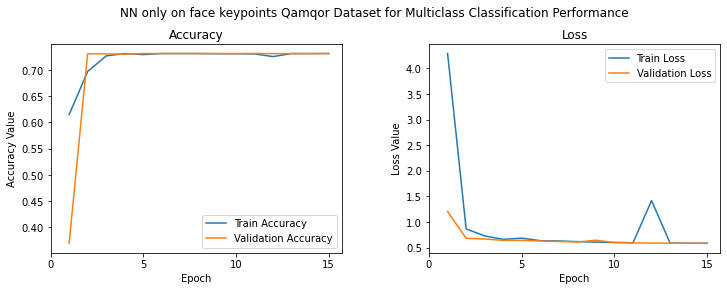

In [33]:
#Graph to test for overfitting
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('NN only on face keypoints Qamqor Dataset for Multiclass Classification Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1, 16))
ax1.plot(epoch_list, history_qf.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history_qf.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 16, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history_qf.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history_qf.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 16, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [34]:
pred_yqf = np.round(model_qf.predict(Xqf_test))

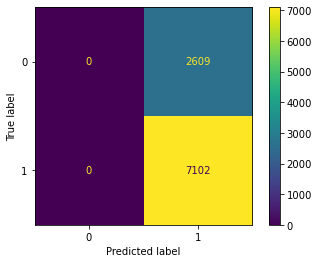

In [35]:
# Confusion matrix
disp6 = ConfusionMatrixDisplay(confusion_matrix(yqf_test, pred_yqf))
disp6.plot()

# Model for Pinsoro - face only
 

In [49]:
#Features and labels for pinsoro
X_pf = np.array(pinsoro[pinsoro.columns[0:139]])
y_pf = pinsoro['purple_child_social_engagement']
#one hot encoding
y_pf = np_utils.to_categorical(y_pf)

In [50]:
#Split to train, validation, and test sets in ratio 80:10:10 for pinsoro
Xpf_train, Xpf_rem, ypf_train, ypf_rem = train_test_split(X_pf, y_pf, train_size=0.8, random_state=123, stratify=y_pf)
Xpf_valid, Xpf_test, ypf_valid, ypf_test = train_test_split(Xpf_rem, ypf_rem, test_size=0.5, random_state=123, stratify=ypf_rem)

In [53]:
#Neural network model for pinsoro
model_pf = Sequential(
    [
    layers.Dense(256, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(6,activation = 'softmax')
    ])
model_pf.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(0.001), metrics=['accuracy'])

In [54]:
#training
history_pf = model_pf.fit(Xpf_train, ypf_train, validation_data=(Xpf_valid, ypf_valid), batch_size = 10000, epochs = 50, verbose = 1)

Epoch 1/50
139/139 [==============================] - 4s 32ms/step - loss: 1.6429 - accuracy: 0.3161 - val_loss: 1.6328 - val_accuracy: 0.3234
Epoch 2/50
139/139 [==============================] - 4s 27ms/step - loss: 1.6176 - accuracy: 0.3320 - val_loss: 1.6287 - val_accuracy: 0.3270
Epoch 3/50
139/139 [==============================] - 4s 28ms/step - loss: 1.6076 - accuracy: 0.3373 - val_loss: 1.6115 - val_accuracy: 0.3423
Epoch 4/50
139/139 [==============================] - 4s 27ms/step - loss: 1.6005 - accuracy: 0.3433 - val_loss: 1.6010 - val_accuracy: 0.3406
Epoch 5/50
139/139 [==============================] - 4s 31ms/step - loss: 1.5946 - accuracy: 0.3459 - val_loss: 1.6105 - val_accuracy: 0.3334
Epoch 6/50
139/139 [==============================] - 4s 30ms/step - loss: 1.5897 - accuracy: 0.3490 - val_loss: 1.6360 - val_accuracy: 0.3314
Epoch 7/50
139/139 [==============================] - 4s 31ms/step - loss: 1.5850 - accuracy: 0.3516 - val_loss: 1.5850 - val_accuracy: 0.3572

In [55]:
#testing
scores_pf = model_pf.evaluate(Xpf_test, ypf_test, verbose = 1)

5392/5392 [==============================] - 14s 3ms/step - loss: 1.5575 - accuracy: 0.3832


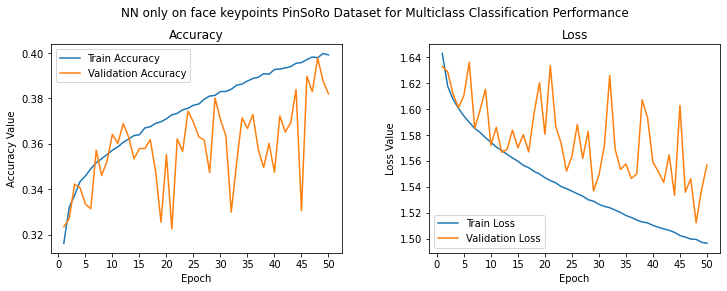

In [56]:
#Graph to test for overfitting
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('NN only on face keypoints PinSoRo Dataset for Multiclass Classification Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1, 51))
ax1.plot(epoch_list, history_pf.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history_pf.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 51, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history_pf.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history_pf.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 51, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [57]:
pred_ypf = np.argmax(model_pf.predict(Xpf_test), axis = 1)

In [58]:
true_ypf = np.argmax(ypf_test, axis = 1)

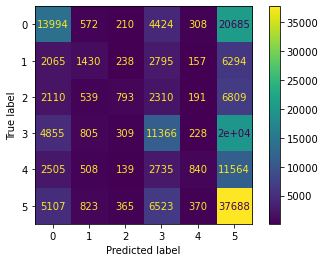

In [59]:
disp7 = ConfusionMatrixDisplay(confusion_matrix(true_ypf, pred_ypf))
disp7.plot()

# Transfer learning for Qamqor - only face


In [60]:
model_temp2 = model_pf

In [66]:
#Freeze all layers of pinsoro model except the last one so that they are not trained
for layer in model_temp2.layers[:-1]:
    layer.trainable = False


In [67]:
model_tl_pf = Sequential(
    [
    model_temp2,
    layers.Dense(1, activation = 'sigmoid'),
    
    ]
)
model_tl_pf.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(0.001), metrics=['accuracy'])


In [68]:
#Training for qamqor with transfer learning - method 2
history_tl_pf = model_tl_pf.fit(Xqf_train, yqf_train, validation_data=(Xqf_valid, yqf_valid), batch_size = 1000, epochs = 15, verbose = 1)

Epoch 1/15
78/78 [==============================] - 1s 11ms/step - loss: 0.8052 - accuracy: 0.3509 - val_loss: 0.7790 - val_accuracy: 0.3637
Epoch 2/15
78/78 [==============================] - 0s 3ms/step - loss: 0.7557 - accuracy: 0.3684 - val_loss: 0.7376 - val_accuracy: 0.3706
Epoch 3/15
78/78 [==============================] - 0s 3ms/step - loss: 0.7166 - accuracy: 0.3778 - val_loss: 0.7023 - val_accuracy: 0.3781
Epoch 4/15
78/78 [==============================] - 0s 4ms/step - loss: 0.6827 - accuracy: 0.4084 - val_loss: 0.6712 - val_accuracy: 0.7264
Epoch 5/15
78/78 [==============================] - 0s 3ms/step - loss: 0.6559 - accuracy: 0.7269 - val_loss: 0.6471 - val_accuracy: 0.7280
Epoch 6/15
78/78 [==============================] - 0s 3ms/step - loss: 0.6332 - accuracy: 0.7291 - val_loss: 0.6262 - val_accuracy: 0.7313
Epoch 7/15
78/78 [==============================] - 0s 5ms/step - loss: 0.6147 - accuracy: 0.7313 - val_loss: 0.6096 - val_accuracy: 0.7313
Epoch 8/15
78/78 [=

In [69]:
pred_ytl_pf = np.round(model_tl_pf.predict(Xqf_test))

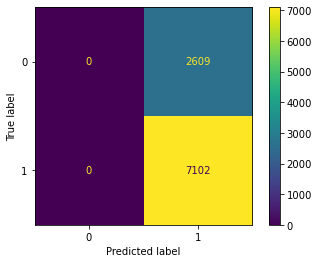

In [70]:
disp8 = ConfusionMatrixDisplay(confusion_matrix(yqf_test, pred_ytl_pf))
disp8.plot()

# Model for Pinsoro if binary classification is used - face only


In [11]:
#Features and labels
X_f = np.array(pinsoro2[pinsoro2.columns[0:139]])
y_f = pinsoro2['purple_child_social_engagement']

In [12]:
#Split to train, validation, and test sets in ratio 80:10:10
Xf_train, Xf_rem, yf_train, yf_rem = train_test_split(X_f, y_f, train_size=0.8, random_state=123, stratify=y_f)
Xf_valid, Xf_test, yf_valid, yf_test = train_test_split(Xf_rem,yf_rem, test_size=0.5, random_state=123, stratify=yf_rem)

In [13]:
#Neural network model
model_f = Sequential(
    [
    layers.Dense(256, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(1,activation = 'sigmoid')
    ])
model_f.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(0.001), metrics=['accuracy'])

In [14]:
#training
history_f = model_f.fit(Xf_train, yf_train, validation_data=(Xf_valid, yf_valid), batch_size = 10000, epochs = 50, verbose = 1)

Epoch 1/50
106/106 [==============================] - 3s 25ms/step - loss: 0.4912 - accuracy: 0.8051 - val_loss: 0.4828 - val_accuracy: 0.8057
Epoch 2/50
106/106 [==============================] - 2s 20ms/step - loss: 0.4835 - accuracy: 0.8061 - val_loss: 0.4804 - val_accuracy: 0.8062
Epoch 3/50
106/106 [==============================] - 2s 20ms/step - loss: 0.4813 - accuracy: 0.8064 - val_loss: 0.4777 - val_accuracy: 0.8064
Epoch 4/50
106/106 [==============================] - 2s 20ms/step - loss: 0.4799 - accuracy: 0.8065 - val_loss: 0.4758 - val_accuracy: 0.8066
Epoch 5/50
106/106 [==============================] - 2s 20ms/step - loss: 0.4784 - accuracy: 0.8067 - val_loss: 0.4793 - val_accuracy: 0.8066
Epoch 6/50
106/106 [==============================] - 2s 20ms/step - loss: 0.4772 - accuracy: 0.8069 - val_loss: 0.4764 - val_accuracy: 0.8063
Epoch 7/50
106/106 [==============================] - 2s 20ms/step - loss: 0.4767 - accuracy: 0.8068 - val_loss: 0.4748 - val_accuracy: 0.8068

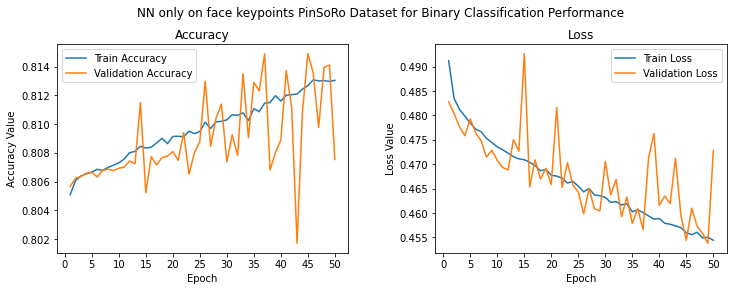

In [15]:
#Graph to test for overfitting
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('NN only on face keypoints PinSoRo Dataset for Binary Classification Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1, 51))
ax1.plot(epoch_list, history_f.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history_f.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 51, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history_f.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history_f.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 51, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [16]:
scores_f = model_f.evaluate(Xf_test, yf_test, verbose = 1)

4136/4136 [==============================] - 3s 701us/step - loss: 0.4715 - accuracy: 0.8078


In [17]:
pred_f = np.round(model_f.predict(Xf_test))

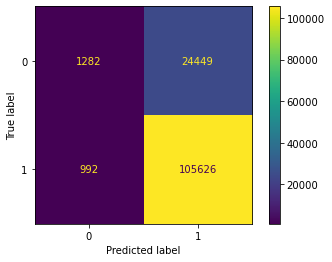

In [18]:
disp8 = ConfusionMatrixDisplay(confusion_matrix(yf_test, pred_f))
disp8.plot()

# Transfer learning for Pinsoro with binary classification - face only

In [19]:
model_tl_fbin = model_f

In [20]:
#Freeze all layers of pinsoro model except the last one so that they are not trained
for layer in model_tl_fbin.layers[:-1]:
    layer.trainable = False


In [26]:

model_tl_fbin.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(0.001), metrics=['accuracy'])

In [27]:
#Training for qamqor with transfer learning
history_tl_f = model_tl_fbin.fit(Xqf_train, yqf_train, validation_data=(Xqf_valid, yqf_valid), batch_size = 1000, epochs = 15, verbose = 1)

Epoch 1/15
78/78 [==============================] - 0s 3ms/step - loss: 118.2274 - accuracy: 0.6580 - val_loss: 110.2144 - val_accuracy: 0.6595
Epoch 2/15
78/78 [==============================] - 0s 2ms/step - loss: 98.1598 - accuracy: 0.6600 - val_loss: 90.9222 - val_accuracy: 0.6604
Epoch 3/15
78/78 [==============================] - 0s 2ms/step - loss: 81.7444 - accuracy: 0.6602 - val_loss: 75.1936 - val_accuracy: 0.6602
Epoch 4/15
78/78 [==============================] - 0s 2ms/step - loss: 68.4784 - accuracy: 0.6588 - val_loss: 62.6280 - val_accuracy: 0.6553
Epoch 5/15
78/78 [==============================] - 0s 2ms/step - loss: 57.5910 - accuracy: 0.6512 - val_loss: 52.5483 - val_accuracy: 0.6394
Epoch 6/15
78/78 [==============================] - 0s 2ms/step - loss: 48.4510 - accuracy: 0.6398 - val_loss: 44.2184 - val_accuracy: 0.6267
Epoch 7/15
78/78 [==============================] - 0s 2ms/step - loss: 40.4954 - accuracy: 0.6283 - val_loss: 36.8549 - val_accuracy: 0.6175
Epoc

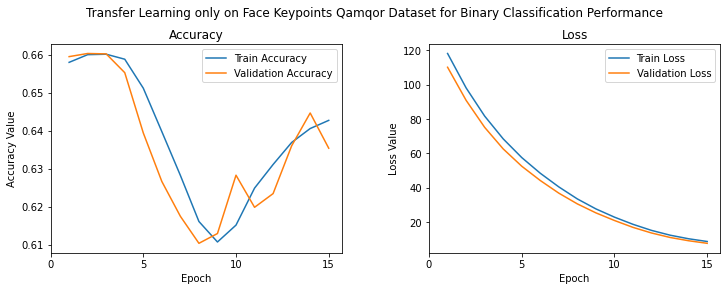

In [28]:
#Graph to test for overfitting
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Transfer Learning only on Face Keypoints Qamqor Dataset for Binary Classification Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1, 16))
ax1.plot(epoch_list, history_tl_f.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history_tl_f.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 16, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history_tl_f.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history_tl_f.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 16, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [29]:
scores_tl_f = model_tl_fbin.evaluate(Xqf_test, yqf_test, verbose = 1)

304/304 [==============================] - 0s 645us/step - loss: 7.9211 - accuracy: 0.6361


In [30]:
pred_tl_f = np.round(model_tl_fbin.predict(Xqf_test))

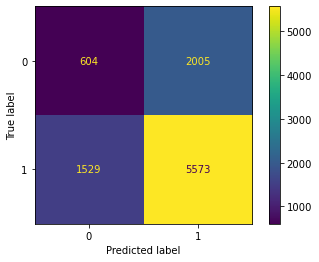

In [31]:
disp10 = ConfusionMatrixDisplay(confusion_matrix(yqf_test, pred_tl_f))
disp10.plot()